# Libs

In [ ]:
# import libs
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
!pip install -U kaleido
!pip install numba==0.53
#from pandas_profiling import ProfileReport
!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
!pip install pycaret
import pycaret
from pycaret.classification import *
!pip install scikit-learn==0.23.2
#import plotly.io as pio
#pio.renderers.default='notebook'

# Import dataset

In [2]:
# read .csv as dataframe
df = pd.read_csv('dataset.csv')

# Exploratory Data Analysis (EDA) + Pre-processing

In [3]:
# check dataframe header
df

,Start Time,Period (min),NE Name,Cell,L.RA.TA.UE.Index0 (None),L.RA.GrpA.Att (None),L.RA.GrpA.Resp (None),L.RA.GrpA.ContResolution (None),L.RA.GrpB.Att (None),L.RA.GrpB.Resp (None),L.RA.GrpB.ContResolution (None),L.RRC.ConnReq.Msg (None),L.RRC.ConnReq.Att (None),L.RRC.ConnReq.Att.Emc (None),L.RRC.ConnReq.Att.HighPri (None),L.RRC.ConnReq.Att.Mt (None),L.RRC.ConnReq.Att.MoSig (None),L.RRC.ConnReq.Att.MoData (None),L.RRC.ConnSetup (None),L.RRC.ConnReq.Succ (None),L.RRC.ConnReq.Succ.Emc (None),L.RRC.ConnReq.Succ.HighPri (None),L.RRC.ConnReq.Succ.Mt (None),L.RRC.ConnReq.Succ.MoSig (None),L.RRC.ConnReq.Succ.MoData (None),L.RRC.ConnReq.Att.DelayTol (None),L.RRC.ConnReq.Succ.DelayTol (None),L.RRC.ConnSetup.TimeAvg (ms),L.RRC.ConnReq.Msg.disc.FlowCtrl (None),L.RRC.ConnReq.Msg.disc.Illegal (None),L.RRC.SetupFail.NoReply (None),L.RRC.SetupFail.Rej (None),L.RRC.SetupFail.Rej.FlowCtrl (None),L.RRC.SetupFail.Rej.ForbidAc (None),L.RRC.SetupFail.Rej.MMEOverload (None),L.RRC.SetupFail.Rej.Other (None),L.RRC.SetupFail.ResFail (None),L.RRC.SetupFail.ResFail.CellBarred (None),L.RRC.SetupFail.ResFail.Other (None),L.RRC.SetupFail.ResFail.PUCCH (None),L.RRC.SetupFail.ResFail.SRS (None),L.RRC.SetupFail.ResFail.UserSpec (None),L.RRC.ConnReq.Max (None),L.S1Sig.ConnEst.Att (None),L.S1Sig.ConnEst.Succ (None),L.E-RAB.InitAttEst (None),L.E-RAB.InitSuccEst (None),L.E-RAB.SuccEst (None),L.E-RAB.AttEst (None),L.E-RAB.FailEst.MME (None),L.E-RAB.FailEst.TNL (None),L.E-RAB.FailEst.RNL (None),L.E-RAB.FailEst.X2AP (None),L.E-RAB.FailEst.Other (None),L.E-RAB.AbnormRel (None),L.E-RAB.NormRel (None),L.E-RAB.AbnormRel.Radio (None),L.E-RAB.AbnormRel.TNL (None),L.E-RAB.AbnormRel.Cong (None),L.E-RAB.AbnormRel.HOFailure (None),L.E-RAB.AbnormRel.MME (None),L.RA.TA.UE.Index1 (None),L.RA.TA.UE.Index10 (None),L.RA.TA.UE.Index11 (None),L.RA.TA.UE.Index2 (None),L.RA.TA.UE.Index3 (None),L.RA.TA.UE.Index4 (None),L.RA.TA.UE.Index5 (None),L.RA.TA.UE.Index6 (None),L.RA.TA.UE.Index7 (None),L.RA.TA.UE.Index8 (None),L.RA.TA.UE.Index9 (None),L.ChMeas.CQI.DL.0 (None),L.ChMeas.CQI.DL.1 (None),L.ChMeas.CQI.DL.10 (None),L.ChMeas.CQI.DL.11 (None),L.ChMeas.CQI.DL.12 (None),L.ChMeas.CQI.DL.13 (None),L.ChMeas.CQI.DL.14 (None),L.ChMeas.CQI.DL.15 (None),L.ChMeas.CQI.DL.2 (None),L.ChMeas.CQI.DL.3 (None),L.ChMeas.CQI.DL.4 (None),L.ChMeas.CQI.DL.5 (None),L.ChMeas.CQI.DL.6 (None),L.ChMeas.CQI.DL.7 (None),L.ChMeas.CQI.DL.8 (None),L.ChMeas.CQI.DL.9 (None),L.UL.Interference.Avg (dBm),L.UL.Interference.Max (dBm),L.UL.Interference.Min (dBm),L.Cell.Avail.Dur (s),L.Cell.Unavail.Dur.Sys (s),L.Cell.Unavail.Dur.Manual (s),L.Cell.Unavail.Dur.EnergySaving (s),L.Cell.Unavail.Dur.Sys.S1Fail (s),L.Traffic.User.Avg (None),L.Traffic.User.Max (None)
0,7/13/2021 0:00,60,SR-eNB04,"eNodeB Function Name=4G-eNB04, Local Cell ID=17, Cell Name=4C-eNB04-08-A, eNodeB ID=9299999, Cell FDD TDD indication=CELL_FDD",0,1424,1424,422,0,0,0,414,414,0,0,133,108,173,414,410,0,0,133,104,173,0,0,86,0,NIL,4,0,0,0,0,0,0,0,0,0,0,0,2,410,410,574,571,624,627,3,0,0,0,0,1,1103,1,0,0,0,0,0,0,0,41,4,42,115,565,30,0,0,8660,2628,605469,135083,46819,37882,18096,182762,3886,21482,89505,207932,155493,90350,97702,312811,-121,-105,-122,3600,0,0,0,0,7.799,15
1,7/13/2021 1:00,60,SR-eNB04,"eNodeB Function Name=4G-eNB04, Local Cell ID=17, Cell Name=4C-eNB04-08-A, eNodeB ID=9299999, Cell FDD TDD indication=CELL_FDD",0,533,533,328,6,6,0,322,322,0,0,83,81,158,322,321,0,0,82,81,158,0,0,60,0,NIL,1,0,0,0,0,0,0,0,0,0,0,0,2,321,321,418,418,473,473,0,0,0,0,0,0,870,0,0,0,0,0,0,0,0,50,0,10,88,489,38,0,0,5218,2009,174452,144710,50901,33454,11955,166690,2543,9729,29075,63503,143961,495198,87836,107249,-121,-105,-123,3600,0,0,0,0,5.847,13
2,7/13/2021 2:00,60,SR-eNB04,"eNodeB Function Name=4G-eNB04, Local Cell ID=17, Cell Name=4C-eNB04-08-A, eNodeB ID=9299999, Cell FDD TDD indication=CELL_FDD",0,1456,1456,357,1,1,1,351,351,0,0,109,97,145,351,351,0,0,109,97,145,0,0,43,0,NIL,0,0,0,0,0,0,0,0,0,0,0,0,3,351,351,434,433,485,486,1,0,0,0,0,0,802,0,0,0,0,0,0,0,0,94,2,11,104,413,13

In [4]:
# convert 'Start Time' column type for date/time pandas object type
df['Start Time'] = pd.to_datetime(df['Start Time'])
# by date
df = df.sort_values(by='Start Time')
df

,Start Time,Period (min),NE Name,Cell,L.RA.TA.UE.Index0 (None),L.RA.GrpA.Att (None),L.RA.GrpA.Resp (None),L.RA.GrpA.ContResolution (None),L.RA.GrpB.Att (None),L.RA.GrpB.Resp (None),L.RA.GrpB.ContResolution (None),L.RRC.ConnReq.Msg (None),L.RRC.ConnReq.Att (None),L.RRC.ConnReq.Att.Emc (None),L.RRC.ConnReq.Att.HighPri (None),L.RRC.ConnReq.Att.Mt (None),L.RRC.ConnReq.Att.MoSig (None),L.RRC.ConnReq.Att.MoData (None),L.RRC.ConnSetup (None),L.RRC.ConnReq.Succ (None),L.RRC.ConnReq.Succ.Emc (None),L.RRC.ConnReq.Succ.HighPri (None),L.RRC.ConnReq.Succ.Mt (None),L.RRC.ConnReq.Succ.MoSig (None),L.RRC.ConnReq.Succ.MoData (None),L.RRC.ConnReq.Att.DelayTol (None),L.RRC.ConnReq.Succ.DelayTol (None),L.RRC.ConnSetup.TimeAvg (ms),L.RRC.ConnReq.Msg.disc.FlowCtrl (None),L.RRC.ConnReq.Msg.disc.Illegal (None),L.RRC.SetupFail.NoReply (None),L.RRC.SetupFail.Rej (None),L.RRC.SetupFail.Rej.FlowCtrl (None),L.RRC.SetupFail.Rej.ForbidAc (None),L.RRC.SetupFail.Rej.MMEOverload (None),L.RRC.SetupFail.Rej.Other (None),L.RRC.SetupFail.ResFail (None),L.RRC.SetupFail.ResFail.CellBarred (None),L.RRC.SetupFail.ResFail.Other (None),L.RRC.SetupFail.ResFail.PUCCH (None),L.RRC.SetupFail.ResFail.SRS (None),L.RRC.SetupFail.ResFail.UserSpec (None),L.RRC.ConnReq.Max (None),L.S1Sig.ConnEst.Att (None),L.S1Sig.ConnEst.Succ (None),L.E-RAB.InitAttEst (None),L.E-RAB.InitSuccEst (None),L.E-RAB.SuccEst (None),L.E-RAB.AttEst (None),L.E-RAB.FailEst.MME (None),L.E-RAB.FailEst.TNL (None),L.E-RAB.FailEst.RNL (None),L.E-RAB.FailEst.X2AP (None),L.E-RAB.FailEst.Other (None),L.E-RAB.AbnormRel (None),L.E-RAB.NormRel (None),L.E-RAB.AbnormRel.Radio (None),L.E-RAB.AbnormRel.TNL (None),L.E-RAB.AbnormRel.Cong (None),L.E-RAB.AbnormRel.HOFailure (None),L.E-RAB.AbnormRel.MME (None),L.RA.TA.UE.Index1 (None),L.RA.TA.UE.Index10 (None),L.RA.TA.UE.Index11 (None),L.RA.TA.UE.Index2 (None),L.RA.TA.UE.Index3 (None),L.RA.TA.UE.Index4 (None),L.RA.TA.UE.Index5 (None),L.RA.TA.UE.Index6 (None),L.RA.TA.UE.Index7 (None),L.RA.TA.UE.Index8 (None),L.RA.TA.UE.Index9 (None),L.ChMeas.CQI.DL.0 (None),L.ChMeas.CQI.DL.1 (None),L.ChMeas.CQI.DL.10 (None),L.ChMeas.CQI.DL.11 (None),L.ChMeas.CQI.DL.12 (None),L.ChMeas.CQI.DL.13 (None),L.ChMeas.CQI.DL.14 (None),L.ChMeas.CQI.DL.15 (None),L.ChMeas.CQI.DL.2 (None),L.ChMeas.CQI.DL.3 (None),L.ChMeas.CQI.DL.4 (None),L.ChMeas.CQI.DL.5 (None),L.ChMeas.CQI.DL.6 (None),L.ChMeas.CQI.DL.7 (None),L.ChMeas.CQI.DL.8 (None),L.ChMeas.CQI.DL.9 (None),L.UL.Interference.Avg (dBm),L.UL.Interference.Max (dBm),L.UL.Interference.Min (dBm),L.Cell.Avail.Dur (s),L.Cell.Unavail.Dur.Sys (s),L.Cell.Unavail.Dur.Manual (s),L.Cell.Unavail.Dur.EnergySaving (s),L.Cell.Unavail.Dur.Sys.S1Fail (s),L.Traffic.User.Avg (None),L.Traffic.User.Max (None)
0,2021-07-13 00:00:00,60,SR-eNB04,"eNodeB Function Name=4G-eNB04, Local Cell ID=17, Cell Name=4C-eNB04-08-A, eNodeB ID=9299999, Cell FDD TDD indication=CELL_FDD",0,1424,1424,422,0,0,0,414,414,0,0,133,108,173,414,410,0,0,133,104,173,0,0,86,0,NIL,4,0,0,0,0,0,0,0,0,0,0,0,2,410,410,574,571,624,627,3,0,0,0,0,1,1103,1,0,0,0,0,0,0,0,41,4,42,115,565,30,0,0,8660,2628,605469,135083,46819,37882,18096,182762,3886,21482,89505,207932,155493,90350,97702,312811,-121,-105,-122,3600,0,0,0,0,7.799,15
1,2021-07-13 01:00:00,60,SR-eNB04,"eNodeB Function Name=4G-eNB04, Local Cell ID=17, Cell Name=4C-eNB04-08-A, eNodeB ID=9299999, Cell FDD TDD indication=CELL_FDD",0,533,533,328,6,6,0,322,322,0,0,83,81,158,322,321,0,0,82,81,158,0,0,60,0,NIL,1,0,0,0,0,0,0,0,0,0,0,0,2,321,321,418,418,473,473,0,0,0,0,0,0,870,0,0,0,0,0,0,0,0,50,0,10,88,489,38,0,0,5218,2009,174452,144710,50901,33454,11955,166690,2543,9729,29075,63503,143961,495198,87836,107249,-121,-105,-123,3600,0,0,0,0,5.847,13
2,2021-07-13 02:00:00,60,SR-eNB04,"eNodeB Function Name=4G-eNB04, Local Cell ID=17, Cell Name=4C-eNB04-08-A, eNodeB ID=9299999, Cell FDD TDD indication=CELL_FDD",0,1456,1456,357,1,1,1,351,351,0,0,109,97,145,351,351,0,0,109,97,145,0,0,43,0,NIL,0,0,0,0,0,0,0,0,0,0,0,0,3,351,351,434,433,485,486,1,0,0,0,0,0,802,0,0,0,0,0,0,0,0,94,

In [5]:
# add new column with new 3GPP KPI function by 3GPP performance indicator counters
df['RRC Setup Success Rate (%)'] = (df["L.RRC.ConnReq.Succ (None)"]/df["L.RRC.ConnReq.Att (None)"])*100
# verify NaN rows
print(df['RRC Setup Success Rate (%)'].isna().sum())
# notes.: div 0/0 = NaN, hence div 0/0 = 100%
#df=df.fillna(100)

0


In [6]:
# verify column types
df.dtypes

Start Time                                   datetime64[ns]
Period (min)                                          int64
NE Name                                              object
Cell                                                 object
L.RA.TA.UE.Index0 (None)                              int64
L.RA.GrpA.Att (None)                                  int64
L.RA.GrpA.Resp (None)                                 int64
L.RA.GrpA.ContResolution (None)                       int64
L.RA.GrpB.Att (None)                                  int64
L.RA.GrpB.Resp (None)                                 int64
L.RA.GrpB.ContResolution (None)                       int64
L.RRC.ConnReq.Msg (None)                              int64
L.RRC.ConnReq.Att (None)                              int64
L.RRC.ConnReq.Att.Emc (None)                          int64
L.RRC.ConnReq.Att.HighPri (None)                      int64
L.RRC.ConnReq.Att.Mt (None)                           int64
L.RRC.ConnReq.Att.MoSig (None)          

In [7]:
# verify column qty. 
len(df.columns)

99

In [8]:
# delete any column with no sample values (value==NIL)
df = df.drop(columns=df.columns[(df=='NIL').any()])
# verify column qty. 
len(df.columns)

98

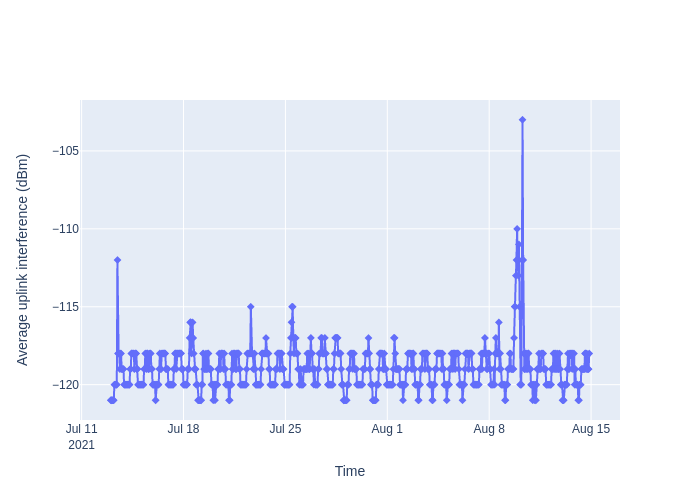

In [9]:
# plot 3GPP KPI
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Start Time'], y=df['L.UL.Interference.Avg (dBm)'],
                    mode='lines+markers', marker_symbol=2))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Average uplink interference (dBm)')
fig.show("png")

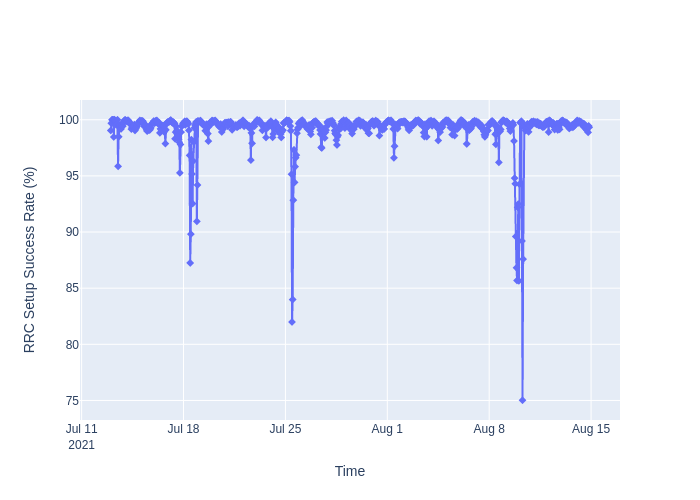

In [10]:
# plot 3GPP KPI
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Start Time'], y=df['RRC Setup Success Rate (%)'],
                    mode='lines+markers', marker_symbol=2))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='RRC Setup Success Rate (%)')
fig.show("png") 

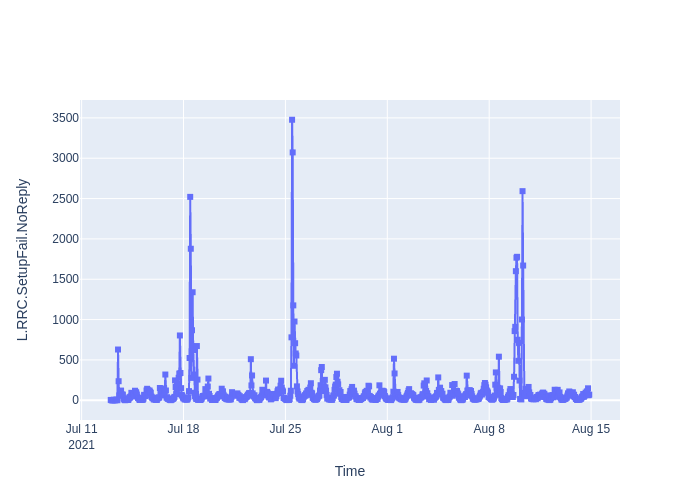

In [11]:
# plot 3GPP KPI
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Start Time'], y=df['L.RRC.SetupFail.NoReply (None)'],
                    mode='lines+markers', marker_symbol=1))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='L.RRC.SetupFail.NoReply')
fig.show("png")

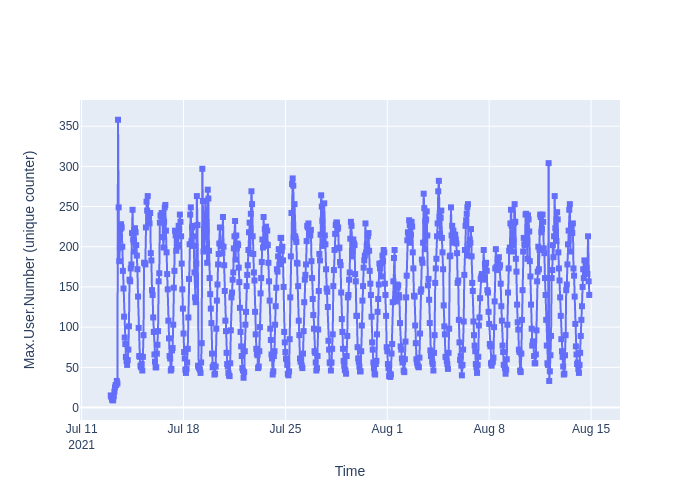

In [12]:
# plot 3GPP KPI
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Start Time'], y=df['L.Traffic.User.Max (None)'],
                    mode='lines+markers', marker_symbol=1))
fig.update_xaxes(title_text='Time')
fig.update_yaxes(title_text='Max.User.Number (unique counter)')
fig.show("png")

In [13]:
# for titles
#profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
#profile

In [14]:
AV = AutoViz_Class()
dft = AV.AutoViz('dataset.csv')

Shape of your Data Set loaded: (790, 98)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Start Time,790,object,0,0.000000,100.000000,1,"combine rare categories, possible ID column: drop"
L.ChMeas.CQI.DL.10 (None),790,int64,0,0.000000,100.000000,0,possible ID column: drop
L.ChMeas.CQI.DL.9 (None),790,int64,0,0.000000,100.000000,0,possible ID column: drop
L.ChMeas.CQI.DL.8 (None),790,int64,0,0.000000,100.000000,0,possible ID column: drop
L.ChMeas.CQI.DL.11 (None),790,int64,0,0.000000,100.000000,0,possible ID column: drop
L.ChMeas.CQI.DL.14 (None),790,int64,0,0.000000,100.000000,0,possible ID column: drop
L.ChMeas.CQI.DL.4 (None),790,int64,0,0.000000,100.000000,0,possible ID column: drop
L.ChMeas.CQI.DL.6 (None),789,int64,0,0.000000,99.873418,0,
L.ChMeas.CQI.DL.12 (None),789,int64,0,0.000000,99.873418,0,
L.ChMeas.CQI.DL.13 (None),789,int64,0,0.000000,99.873418,0,


    98 Predictors classified...
        29 variables removed since they were ID or low-information variables
        List of variables removed: ['Start Time', 'L.ChMeas.CQI.DL.10 (None)', 'L.ChMeas.CQI.DL.11 (None)', 'L.ChMeas.CQI.DL.14 (None)', 'L.ChMeas.CQI.DL.4 (None)', 'L.ChMeas.CQI.DL.8 (None)', 'L.ChMeas.CQI.DL.9 (None)', 'Period (min)', 'NE Name', 'Cell', 'L.RRC.ConnReq.Att.HighPri (None)', 'L.RRC.ConnReq.Succ.HighPri (None)', 'L.RRC.ConnReq.Att.DelayTol (None)', 'L.RRC.ConnReq.Succ.DelayTol (None)', 'L.RRC.ConnReq.Msg.disc.FlowCtrl (None)', 'L.RRC.ConnReq.Msg.disc.Illegal (None)', 'L.RRC.SetupFail.Rej.FlowCtrl (None)', 'L.RRC.SetupFail.Rej.ForbidAc (None)', 'L.RRC.SetupFail.Rej.MMEOverload (None)', 'L.RRC.SetupFail.ResFail.PUCCH (None)', 'L.RRC.SetupFail.ResFail.SRS (None)', 'L.RRC.SetupFail.ResFail.UserSpec (None)', 'L.E-RAB.AbnormRel.Cong (None)', 'L.RA.TA.UE.Index10 (None)', 'L.RA.TA.UE.Index11 (None)', 'L.RA.TA.UE.Index8 (None)', 'L.RA.TA.UE.Index9 (None)', 'L.Cell.Unavail.

In [15]:
# create features from Start Time
#df['Day_name'] = [i.day_name() for i in df['Start Time']]
#df['Hour'] = [i.hour for i in df['Start Time']]
#df['Is_weekday'] = [i.isoweekday() for i in df['Start Time']]
#df

# ML Model - Anomaly

In [16]:
# initialize ML
#s = setup(df, ignore_features=[], session_id=123, silent=True)

In [17]:
# verify available models
#models()

In [18]:
# train modelo
#model_type = create_model('iforest', fraction=0.05)
#model_results = assign_model(model_type)
#model_results.head()

In [19]:
#model_results.loc[model_results['Anomaly'] == 1, 'Anomaly_Value'] = model_results['RRC Setup Success Rate (%)']
#model_results

In [20]:
# plot 3GPP KPI
#fig = go.Figure()
#fig.add_trace(go.Scatter(x=model_results['Start Time'], y=model_results['RRC Setup Success Rate (%)'],
#                    mode='lines+markers', marker_symbol=2, name='RRC Setup Success Rate (%)'))
#fig.add_trace(go.Scatter(x=model_results['Start Time'], y=model_results['Anomaly_Value'],
#                    mode='lines+markers', name='Anomaly'))
#fig.show()

# Anomaly metric labeling

In [21]:
# label anomaly=97.5 for RRC Setup Success Rate (%)
df.loc[df['RRC Setup Success Rate (%)'] < 97.5, 'Anomaly'] = 1
df['Anomaly'] = df['Anomaly'].fillna(0)
df['Anomaly'] = pd.to_numeric(df['Anomaly'])
df.dtypes

Start Time                                   datetime64[ns]
Period (min)                                          int64
NE Name                                              object
Cell                                                 object
L.RA.TA.UE.Index0 (None)                              int64
L.RA.GrpA.Att (None)                                  int64
L.RA.GrpA.Resp (None)                                 int64
L.RA.GrpA.ContResolution (None)                       int64
L.RA.GrpB.Att (None)                                  int64
L.RA.GrpB.Resp (None)                                 int64
L.RA.GrpB.ContResolution (None)                       int64
L.RRC.ConnReq.Msg (None)                              int64
L.RRC.ConnReq.Att (None)                              int64
L.RRC.ConnReq.Att.Emc (None)                          int64
L.RRC.ConnReq.Att.HighPri (None)                      int64
L.RRC.ConnReq.Att.Mt (None)                           int64
L.RRC.ConnReq.Att.MoSig (None)          

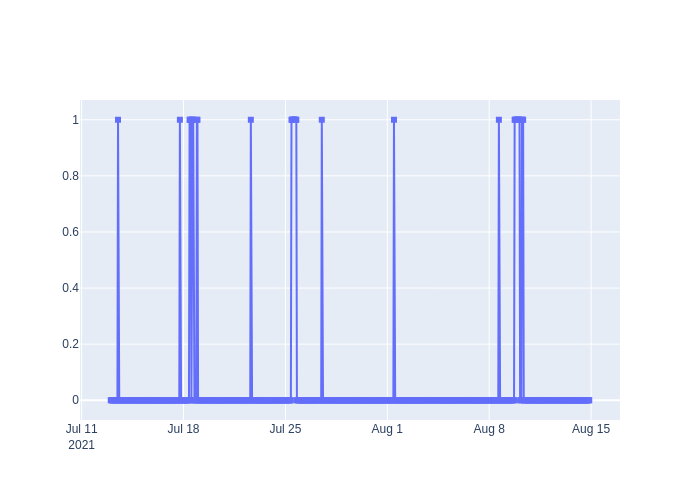

In [22]:
# # plot 3GPP KPI
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Start Time'], y=df['Anomaly'],
                    mode='lines+markers', marker_symbol=1))
fig.show("png")

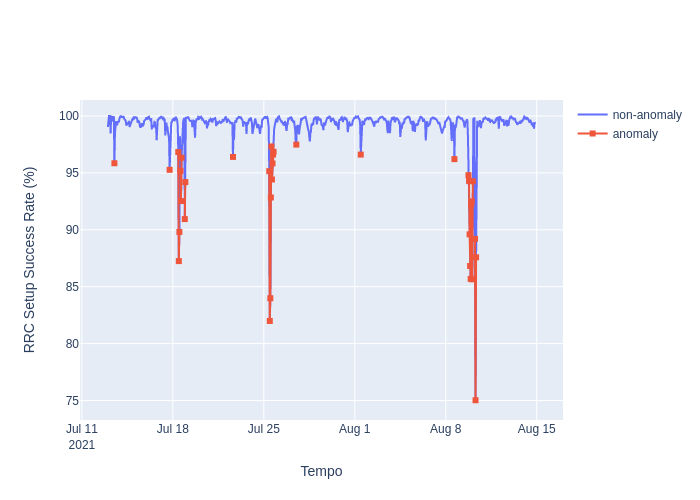

In [23]:
df.loc[df['Anomaly'] == 1, 'Anomaly_Value'] = df['RRC Setup Success Rate (%)']

## # plot 3GPP KPI
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Start Time'], y=df['RRC Setup Success Rate (%)'],
                    mode='lines', name='non-anomaly'))
fig.add_trace(go.Scatter(x=df['Start Time'], y=df['Anomaly_Value'],
                    mode='lines+markers', marker_symbol=1, name='anomaly'))

fig.update_xaxes(title_text='Tempo')
fig.update_yaxes(title_text='RRC Setup Success Rate (%)')
fig.show("png")

# Features calassification

In [24]:
# set inputs and features for ML model
s = setup(data=df,
          target='Anomaly',
          session_id=123,
          normalize=True, 
          transformation=True, 
          ignore_low_variance=False,
          ignore_features=['Start Time', 'Anomaly_Value', 'Period (min)', 'NE Name', 'Cell', 'RRC Setup Success Rate (%)', 'L.RRC.SetupFail.NoReply (None)'],
          log_experiment=True,
          experiment_name='setup',
          fold_shuffle=True,
          imputation_type='iterative',
          silent=True)

,Description,Value
0,session_id,123
1,Target,Anomaly
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(790, 100)"
5,Missing Values,True
6,Numeric Features,56
7,Categorical Features,36
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:Logging experiment in MLFlow
INFO:logs:SubProcess save_model() called ==================================
INFO:logs:Initializing save_model()
INFO:logs:save_model(model=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False,
                                      features_todrop=['Start Time',
                                                       'Anomaly_Value',
                                                       'Period (min)',
                                                       'NE Name', 'Cell',
                                                       'RRC Setup Success Rate '
                                                       '(%)',
                                                       'L.RRC.SetupFail.NoReply '
                                                       '(None)'],
                                      id_columns=[],
                     

In [25]:
# compare ML models
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9837,0.9930,0.8000,0.8900,0.8105,0.8028,0.8205,0.444
et,Extra Trees Classifier,0.9836,0.9940,0.6833,0.8667,0.7400,0.7348,0.7528,0.462
ridge,Ridge Classifier,0.9819,0.0000,0.6333,0.8500,0.7100,0.7038,0.7200,0.017
knn,K Neighbors Classifier,0.9801,0.9459,0.5667,0.8000,0.6533,0.6481,0.6636,0.119
svm,SVM - Linear Kernel,0.9800,0.0000,0.8500,0.7833,0.7967,0.7866,0.7972,0.017
ada,Ada Boost Classifier,0.9800,0.9426,0.7167,0.8400,0.7371,0.7286,0.7492,0.183
lr,Logistic Regression,0.9782,0.9861,0.6833,0.7833,0.7000,0.6921,0.7093,0.475
gbc,Gradient Boosting Classifier,0.9782,0.9104,0.7833,0.7867,0.7752,0.7647,0.7695,0.485
lda,Linear Discriminant Analysis,0.9765,0.9668,0.5500,0.7417,0.6124,0.6053,0.6225,0.027
rf,Random Forest Classifier,0.9764,0.9946,0.6167,0.8500,0.6867,0.6761,0.6998,0.510


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:compare_models() succesfully completed......................................


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [26]:
# create model with best training model 
model = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9455,0.9623,1.0000,0.4000,0.5714,0.5479,0.6143
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9818,0.9811,0.5000,1.0000,0.6667,0.6584,0.7005
5,0.9818,0.5849,0.5000,1.0000,0.6667,0.6584,0.7005
6,0.9818,1.0000,0.5000,1.0000,0.6667,0.6584,0.7005
7,0.9818,1.0000,0.6667,1.0000,0.8000,0.7909,0.8088
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)
INFO:logs:create_model() succesfully completed......................................


In [27]:
# tune ML model
tuned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9455,0.9906,1.0000,0.4000,0.5714,0.5479,0.6143
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9818,0.9623,0.5000,1.0000,0.6667,0.6584,0.7005
5,0.9818,0.5519,0.5000,1.0000,0.6667,0.6584,0.7005
6,0.9818,1.0000,0.5000,1.0000,0.6667,0.6584,0.7005
7,0.9818,1.0000,0.6667,1.0000,0.8000,0.7909,0.8088
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.2,
                   n_estimators=230, random_state=123)
INFO:logs:tune_model() succesfully completed......................................


In [28]:
tune_model

<function pycaret.classification.tune_model(estimator, fold: Union[int, Any, NoneType] = None, round: int = 4, n_iter: int = 10, custom_grid: Union[Dict[str, list], Any, NoneType] = None, optimize: str = 'Accuracy', custom_scorer=None, search_library: str = 'scikit-learn', search_algorithm: Union[str, NoneType] = None, early_stopping: Any = False, early_stopping_max_iters: int = 10, choose_better: bool = False, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, return_tuner: bool = False, verbose: bool = True, tuner_verbose: Union[int, bool] = True, return_train_score: bool = False, **kwargs) -> Any>

# ML model analysis

In [29]:
# plot ML confusion matrix
plot_model(tuned_model, 'confusion_matrix')

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
# extract and save the variable importance
plot_model(tuned_model, plot='feature', save=True)

INFO:logs:Saving 'Feature Importance.png'
INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


'Feature Importance.png'

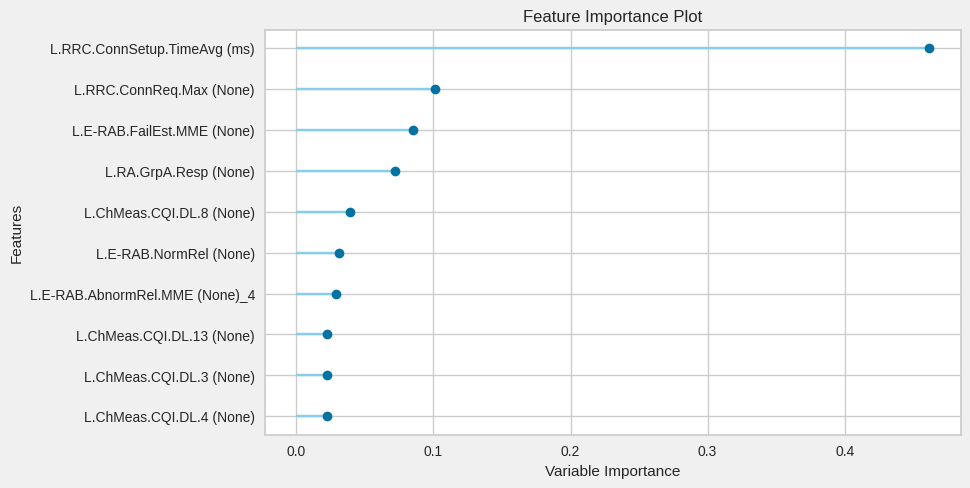

In [33]:
from IPython.display import Image
PATH = "/content/"
Image(filename = PATH + "Feature Importance.png")